In [ ]:
import pandas as pd
a=pd.read_csv('/content/UCI_Credit_Card.csv')
print(a)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [ ]:
pip install scikit-learn

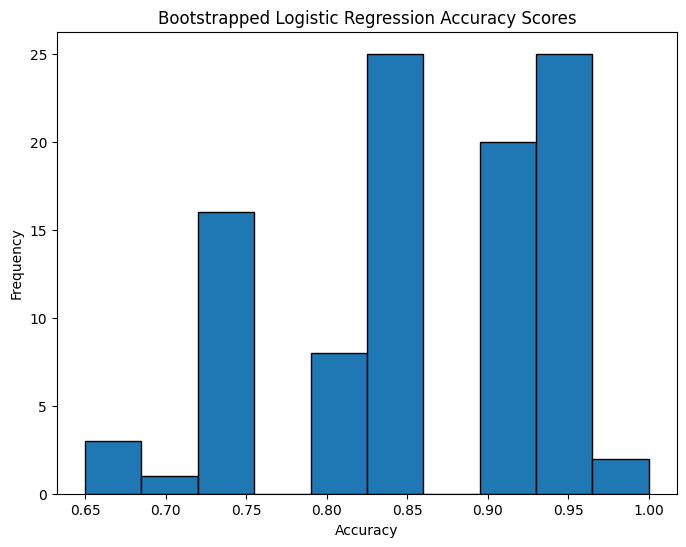

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.random.rand(100, 2)  # Features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Labels (1 if sum of features > 1, else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_samples = 100

# List to store accuracy scores
accuracy_scores = []

for _ in range(num_samples):
    indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_train_bootstrap = X_train[indices]
    y_train_bootstrap = y_train[indices]

    model = LogisticRegression()

    model.fit(X_train_bootstrap, y_train_bootstrap)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores
plt.figure(figsize=(8, 6))
plt.hist(accuracy_scores, bins=10, edgecolor='k')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Bootstrapped Logistic Regression Accuracy Scores')
plt.show()


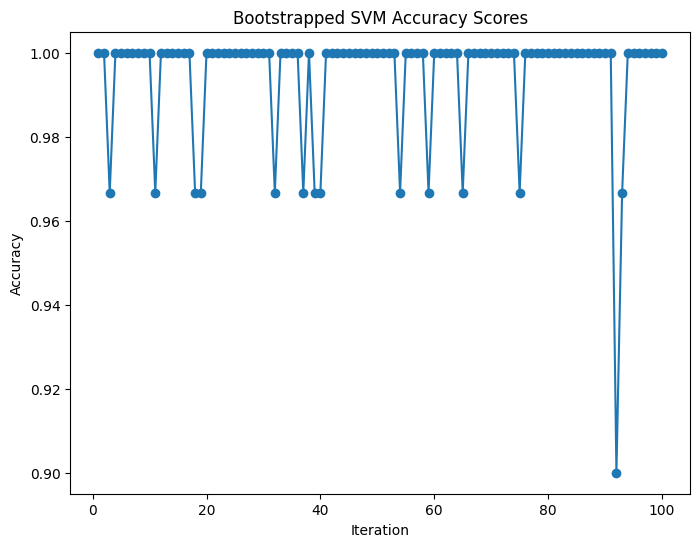

Mean Accuracy: 99.47%


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load a sample dataset (Iris dataset as an example)
data = datasets.load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_samples = 100
accuracy_scores = []
for _ in range(num_samples):
    indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_train_bootstrap = X_train[indices]
    y_train_bootstrap = y_train[indices]
    clf = SVC(kernel='linear', C=1.0)

    clf.fit(X_train_bootstrap, y_train_bootstrap)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_samples + 1), accuracy_scores, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Bootstrapped SVM Accuracy Scores')
plt.show()

# Calculate the mean accuracy score
mean_accuracy = np.mean(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')



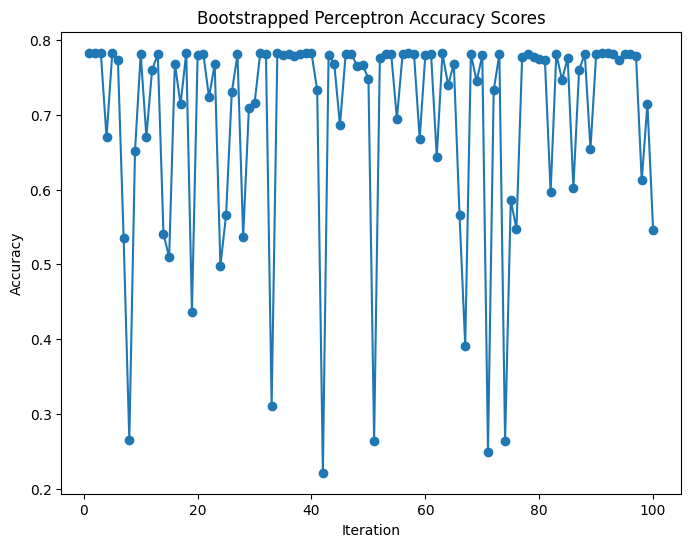

Mean Accuracy: 69.65%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/UCI_Credit_Card.csv')

X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_samples = 100

accuracy_scores = []

for _ in range(num_samples):
    indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_train_bootstrap = X_train.iloc[indices]
    y_train_bootstrap = y_train.iloc[indices]

    clf = Perceptron(max_iter=1000, tol=1e-3)

    clf.fit(X_train_bootstrap, y_train_bootstrap)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_samples + 1), accuracy_scores, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Bootstrapped Perceptron Accuracy Scores')
plt.show()
mean_accuracy = np.mean(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')


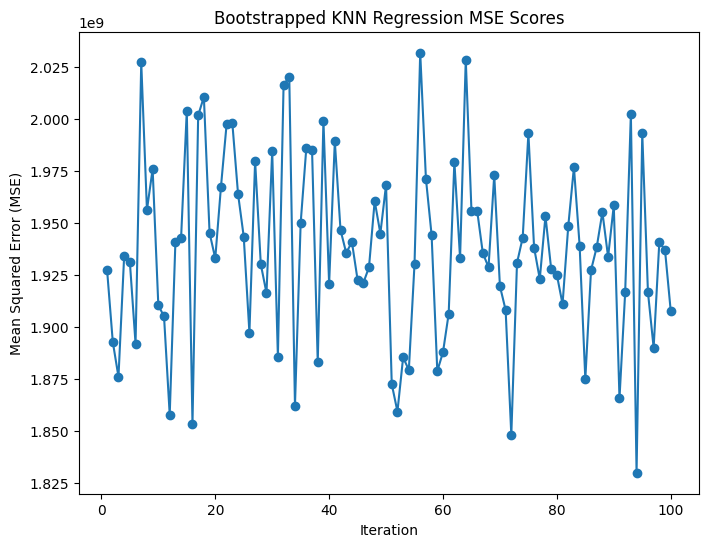

Mean Squared Error (MSE): 1937815137.2974932


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
data = pd.read_csv('/content/UCI_Credit_Card.csv')

X = data.drop(columns=['ID', 'default.payment.next.month'])
y = data['LIMIT_BAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

num_samples = 100
mse_scores = []
for _ in range(num_samples):
    indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_train_bootstrap = X_train[indices]
    y_train_bootstrap = y_train.iloc[indices]

    # Create a KNN regression model
    k = 5  # You can choose the value of k
    knn = KNeighborsRegressor(n_neighbors=k)

    # Fit the model to the bootstrapped training data
    knn.fit(X_train_bootstrap, y_train_bootstrap)

    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_samples + 1), mse_scores, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Bootstrapped KNN Regression MSE Scores')
plt.show()

mean_mse = np.mean(mse_scores)
print(f"Mean Squared Error (MSE): {mean_mse}")


Mean Squared Error (MSE): 1527673234.432


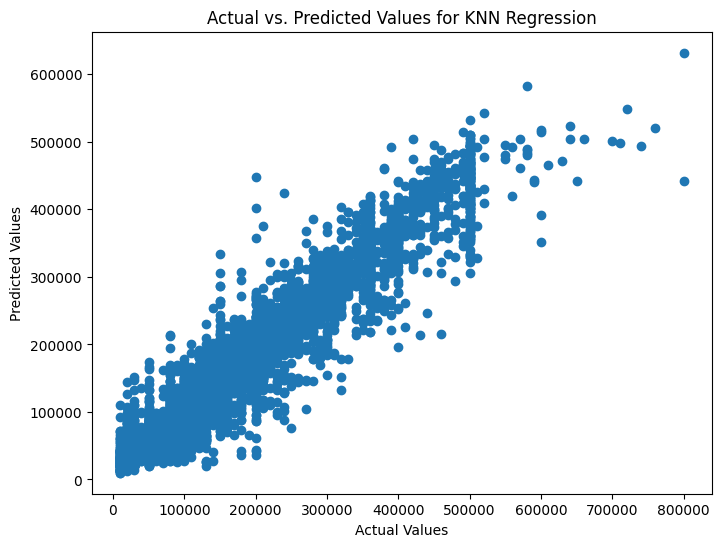

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('/content/UCI_Credit_Card.csv')

X = data.drop(columns=['ID', 'default.payment.next.month'])
y = data['LIMIT_BAL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN regression model
k = 5  # You can choose the value of k
knn = KNeighborsRegressor(n_neighbors=k)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Create a scatter plot to visualize the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for KNN Regression')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/UCI_Credit_Card.csv')

X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a Logistic Regression model with increased max_iter
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions using the model
y_pred = logistic_model.predict(X_test)

# Calculate and print the classification report, suppressing the UndefinedMetricWarning
classification_rep = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(classification_rep)

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Confusion Matrix:
[[4550  137]
 [1003  310]]


In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/UCI_Credit_Card.csv')  # Replace with your dataset path

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix as a table
print(correlation_matrix)


                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

# Load the dataset
data = pd.read_csv('/content/UCI_Credit_Card.csv')  # Replace with your dataset path

# Define the features and the target variable
X = data.drop(columns=['ID', 'default.payment.next.month'])
y = data['default.payment.next.month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (recommended for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
k = 5  # You can choose the value of k
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Accuracy: {accuracy*100:.2f}%")


Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.20
Mean Accuracy: 79.50%
